In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 22 11:13:14 2018

@author: lequang
"""
from __future__ import division

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



def infection_model(network, p, flights, start_node):

    #Extract data of first flight and last flight 
    

    #Create dataframe storing airport and infection time 
    airports = sorted(network.nodes())
    inf_time = np.full((len(airports),), np.inf)
    infection = pd.DataFrame({"Airport":airports, "InfectionTime": inf_time}) 
    
    #Set the infection time of first infected node:
    infection.InfectionTime[start_node] = flights.StartTime.min()
    #Loop over flights and start infection 
    for i in range(len(flights)):
        source = flights.Source[i]
        source_inf_time = infection.InfectionTime[source]
        if (source_inf_time < flights.StartTime[i]):
            random = np.random.rand()
            if random <= p:
                target = flights.Destination[i]
                target_cur_inf_time = infection.InfectionTime[target]
                target_new_inf_time = flights.EndTime[i]
                if target_new_inf_time < target_cur_inf_time:
                    infection.InfectionTime[target] = target_new_inf_time
    return infection


flights = pd.read_csv("./events_US_air_traffic_GMT.txt", sep = " ")

#Read in network data
networkpath = "./aggregated_US_air_traffic_network_undir.edg"
network = nx.read_weighted_edgelist(networkpath, nodetype = int )

#Run model with p = 1
start_node_0 = flights.Source[0] #Initiate the first infected node
flights = flights.sort_values("StartTime")
start_time = flights.StartTime.min() #First infected time
end_time = flights.EndTime.max()

infection = infection_model(network, 1 ,flights, start_node_0)
infection_times = infection.InfectionTime

print("Anchorage infection time: ",infection.InfectionTime[41])



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Anchorage infection time:  1229290800.0


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


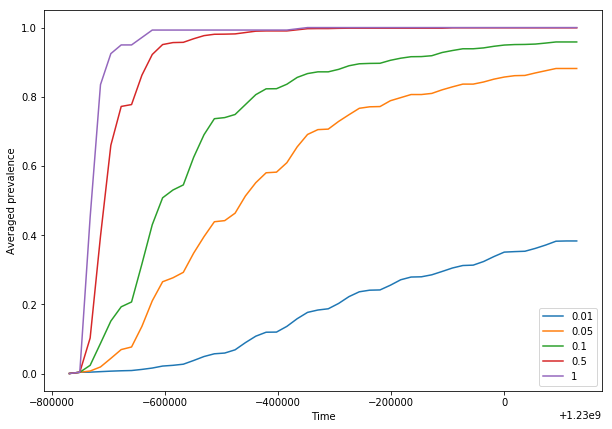

In [2]:
#Task 2: Effect of probability p on spreading speed

def averaged_prevalence_visualization(network, flights, start_node, start, end, p, label):
    stepsize = 50    
    t = np.linspace(start, end, stepsize)  #To increase this stepsize
    p_t = np.zeros((stepsize,10), dtype=float)
    for k in range(0,10):
        infection_p = infection_model(network, p ,flights, start_node)
        for j in range (0,stepsize):
            count = (infection_p.InfectionTime < t[j]).sum()
            prob = float(count/len(infection_p))
            p_t[j,k] = prob
    prevalence = np.average(p_t, axis = 1)
    plt.plot(t, prevalence, label = label)

fig = plt.figure(figsize=(10,7))
for p in (0.01, 0.05, 0.1, 0.5, 1):  
    averaged_prevalence_visualization(network, flights, start_node_0, start_time, end_time, p, p)
plt.xlabel("Time")
plt.ylabel("Averaged prevalence")
plt.legend()
plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


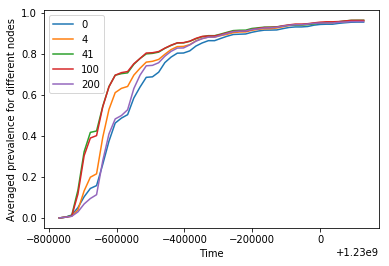

In [3]:
#Task 3
fig = plt.figure(figsize=(10,7))

for node in (0,4,41,100,200):
    start_node = flights.Source[node]
    averaged_prevalence_visualization(network, flights, start_node, start_time, end_time, 0.1, node)
plt.xlabel("Time")
plt.ylabel("Averaged prevalence for different nodes")
plt.legend()
plt.show()

In [ ]:
#Task 4    
n_repeat = 50
time_median = np.zeros((len(network),n_repeat), dtype=float)
for i in range(n_repeat):
    infection_i = infection_model(network, p ,flights, start_node)
    time_median[:,i] = infection_i.InfectionTime
print(time_median)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
#Task 4 cont
from scipy import stats

betweenness = np.array(list(nx.betweenness_centrality(network).values()))
closeness = np.array(list(nx.closeness_centrality(network).values()))
kshell = np.array(list(nx.core_number(network).values()))
clustering_coef = np.array(list(nx.clustering(network).values()))    
degrees = np.array(list(nx.degree(network).values())
strengths = np.array(list(nx.degree(network, weight = "weight").values()))
                   
y_values = [betweenness, closeness, kshell, clustering_coef, degrees, strengths]
y_labels = ["betweenness", "closeness", "kshell", "clustering_coef", "degrees", "strengths"]
time_median = np.average(time_median,axis = 1)

for y_val, label in zip(y_values, labels):
    fig = plt.figure(figsize=(10,7))
    plt.scatter(y_val, time_median)
    plt.xlabel(label)
    plt.ylabel("Median infected time")
    plt.show()
    spearman = stats.spearmanr(y_val, time_median)
    print("Spearman coef " + label + " :", spearman)

